In [1]:
#import xml.etree.ElementTree as ET
from lxml import etree as ET
import pandas as pd
import matplotlib.pyplot as plt
import random


In [2]:

# Function to parse XES file and extract data
def parse_xes(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()

    # Define XES namespace
    namespace = {'xes': 'http://www.xes-standard.org/'}

    # Prepare a list to store events
    data = []

    # Iterate over traces
    for trace in root.findall('trace', namespace):
        case_id = None
        case_attributes = {}

        # Extract case attributes
        for attr in trace.findall('string', namespace):
            if attr.get('key') == 'concept:name':
                case_id = attr.get('value')
            else:
                case_attributes[attr.get('key')] = attr.get('value')

        for attr in trace.findall('int', namespace):
            case_attributes[attr.get('key')] = int(attr.get('value'))

        for attr in trace.findall('float', namespace):
            case_attributes[attr.get('key')] = float(attr.get('value'))

        for attr in trace.findall('boolean', namespace):
            case_attributes[attr.get('key')] = attr.get('value') == 'true'

        # Extract events in the trace
        for event in trace.findall('event', namespace):
            event_data = case_attributes.copy()
            event_data['case_id'] = case_id

            for attr in event.findall('int', namespace):
                event_data[attr.get('key')] = int(attr.get('value'))

            for attr in event.findall('string', namespace):
                event_data[attr.get('key')] = attr.get('value')

            for attr in event.findall('date', namespace):
                event_data[attr.get('key')] = attr.get('value')

            for attr in event.findall('float', namespace):
                event_data[attr.get('key')] = float(attr.get('value'))

            for attr in event.findall('boolean', namespace):
                event_data[attr.get('key')] = attr.get('value') == 'true'

            data.append(event_data)

    return pd.DataFrame(data)

In [3]:
# Load and parse the XES file
file_path = 'Sepsis/sepsis.xes'
event_log_df = parse_xes(file_path)
# Save the parsed data to a CSV for further analysis
event_log_df.to_csv('event_log.csv', index=False)

In [4]:
print(event_log_df.columns)

Index(['case_id', 'Age', 'org:group', 'concept:name', 'lifecycle:transition',
       'Diagnose', 'time:timestamp', 'InfectionSuspected', 'DiagnosticBlood',
       'DisfuncOrg', 'SIRSCritTachypnea', 'Hypotensie', 'SIRSCritHeartRate',
       'Infusion', 'DiagnosticArtAstrup', 'DiagnosticIC', 'DiagnosticSputum',
       'DiagnosticLiquor', 'DiagnosticOther', 'SIRSCriteria2OrMore',
       'DiagnosticXthorax', 'SIRSCritTemperature', 'DiagnosticUrinaryCulture',
       'SIRSCritLeucos', 'Oligurie', 'DiagnosticLacticAcid', 'Hypoxie',
       'DiagnosticUrinarySediment', 'DiagnosticECG', 'Leucocytes', 'CRP',
       'LacticAcid'],
      dtype='object')


In [5]:
# Display summary of the data
print("Event log parsed successfully!")
print(event_log_df.head())

Event log parsed successfully!
  case_id   Age org:group     concept:name lifecycle:transition Diagnose  \
0       A  85.0         A  ER Registration             complete        A   
1       A   NaN         B       Leucocytes             complete      NaN   
2       A   NaN         B              CRP             complete      NaN   
3       A   NaN         B       LacticAcid             complete      NaN   
4       A   NaN         C        ER Triage             complete      NaN   

                  time:timestamp InfectionSuspected DiagnosticBlood  \
0  2014-10-22T11:15:41.000+02:00               True            True   
1  2014-10-22T11:27:00.000+02:00                NaN             NaN   
2  2014-10-22T11:27:00.000+02:00                NaN             NaN   
3  2014-10-22T11:27:00.000+02:00                NaN             NaN   
4  2014-10-22T11:33:37.000+02:00                NaN             NaN   

  DisfuncOrg  ... DiagnosticUrinaryCulture SIRSCritLeucos Oligurie  \
0       True  .

In [6]:
# Example analysis: Count events per case
case_event_counts = event_log_df.groupby('case_id').size()
print("\nNumber of events per case:")
print(case_event_counts)


Number of events per case:
case_id
A      22
AA      8
AAA    11
AB      8
ABA    17
       ..
ZV     12
ZW     13
ZX     10
ZY      8
ZZ     14
Length: 1050, dtype: int64


In [7]:
# Example: Analyze activities by frequency
activity_counts = event_log_df['concept:name'].value_counts()
print("\nActivity frequency:")
print(activity_counts)


Activity frequency:
concept:name
Leucocytes          3383
CRP                 3262
LacticAcid          1466
Admission NC        1182
ER Triage           1053
ER Registration     1050
ER Sepsis Triage    1049
IV Antibiotics       823
IV Liquid            753
Release A            671
Return ER            294
Admission IC         117
Release B             56
Release C             25
Release D             24
Release E              6
Name: count, dtype: int64


In [8]:
def analyze_age_distribution(df, age_column='age'):
    # Convert age values to numeric, ignoring errors
    df[age_column] = pd.to_numeric(df[age_column], errors='coerce')

    # Drop rows with NaN age
    age_data = df[age_column].dropna()

    # Summary statistics
    print("Age Statistics:")
    print(age_data.describe())

    # Plot distribution
    plt.figure(figsize=(10, 6))
    plt.hist(age_data, bins=20, color='skyblue', edgecolor='black')
    plt.title("Distribution of Ages")
    plt.xlabel("Age")
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

Age Statistics:
count    1050.000000
mean       70.080952
std        17.356744
min        20.000000
25%        60.000000
50%        75.000000
75%        85.000000
max        90.000000
Name: Age, dtype: float64


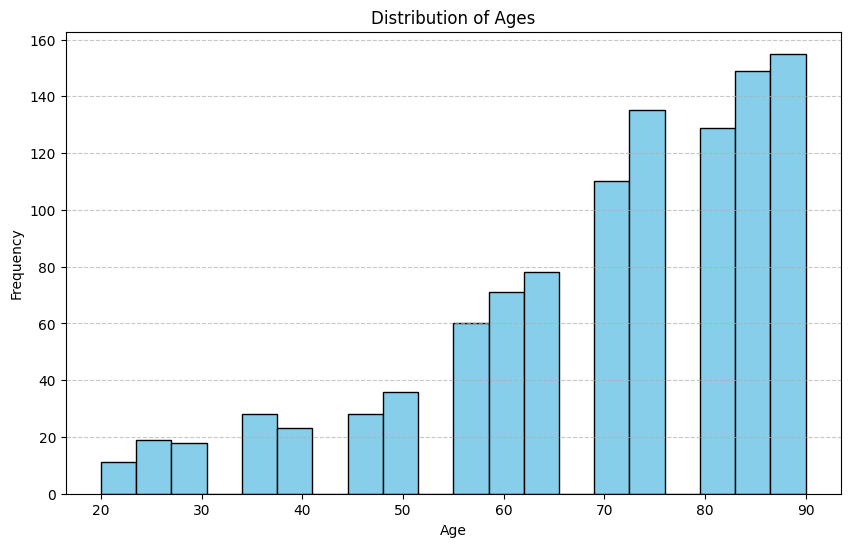

In [9]:
# Analyze and plot age distribution
analyze_age_distribution(event_log_df, age_column='Age')

In [10]:
# Count the number of people for each age
age_counts = event_log_df['Age'].value_counts()

# Display the counts
print("Number of people for each age:")
print(age_counts)

Number of people for each age:
Age
90.0    155
85.0    149
75.0    135
80.0    129
70.0    110
65.0     78
60.0     71
55.0     60
50.0     36
45.0     28
35.0     28
40.0     23
25.0     19
30.0     18
20.0     11
Name: count, dtype: int64


In [11]:
# Extract the year from the event dates
event_log_df['year'] = pd.to_datetime(event_log_df['time:timestamp'], utc=True).dt.year

# Group by the year and count the number of traces
traces_per_year = event_log_df.groupby('year')['case_id'].nunique()

# Display the counts
print("Number of traces per year:")
print(traces_per_year)

Number of traces per year:
year
2013     78
2014    930
2015    125
Name: case_id, dtype: int64


In [12]:
# Sample lists of names and surnames
first_names = ["Alice", "Bob", "Charlie", "Diana", "Eve", "Frank", "Grace", "Hannah", "Ivy", "Jack", "Karen", "Liam", "Mia", "Nathan", "Olivia", "Paul", "Quinn", "Ruby", "Steve", "Tina"]
surnames = ["Smith", "Johnson", "Williams", "Brown", "Jones", "Garcia", "Martinez", "Davis", "Rodriguez", "Hernandez", "Moore", "Taylor", "Anderson", "Thomas", "Jackson", "White", "Harris", "Martin", "Thompson", "Young"]


In [13]:
def generate_patients(age_counts, traces_per_year, first_names, surnames):
    patients = []
    patient_id_counter = 1

    # Iterate over years and ages based on counts
    for year, num_traces in traces_per_year.items():
        for age, count in age_counts.items():
            # Distribute patients across ages and years
            for _ in range(count):
                birth_year = year - age
                name = random.choice(first_names)
                surname = random.choice(surnames)
                patients.append({
                    'patient_id': f"P{patient_id_counter:05d}",
                    'name': name,
                    'surname': surname,
                    'age': age,
                    'reference_year': year,
                    'birth_year': birth_year
                })
                patient_id_counter += 1

    # Shuffle patients to randomize
    random.shuffle(patients)
    return patients

In [14]:
# Generate the patient data
patients = generate_patients(age_counts, traces_per_year, first_names, surnames)

# Convert to DataFrame for easier manipulation
patients_df = pd.DataFrame(patients)
print("Generated Patient Data:")
print(patients_df.head())

Generated Patient Data:
  patient_id     name    surname   age  reference_year  birth_year
0     P02744      Bob     Martin  70.0            2015      1945.0
1     P01782    Karen    Johnson  65.0            2014      1949.0
2     P01416   Nathan      Smith  75.0            2014      1939.0
3     P00188      Ivy  Rodriguez  85.0            2013      1928.0
4     P01707  Charlie      White  70.0            2014      1944.0


# Generate Patient Data

In [23]:
# Define random names and surnames for patients
names = [
    "Aaron", "Abby", "Adam", "Aiden", "Alice", "Amelia", "Andrew", "Angela", "Anna", "Anthony",
    "Aria", "Arthur", "Ava", "Barbara", "Ben", "Benjamin", "Beth", "Blake", "Brandon", "Brian",
    "Brittany", "Brody", "Caleb", "Cameron", "Carla", "Carmen", "Carter", "Catherine", "Charlie",
    "Chloe", "Chris", "Christian", "Claire", "Clara", "Colin", "Connor", "Courtney", "Crystal",
    "Daniel", "David", "Diana", "Dominic", "Dylan", "Edward", "Eleanor", "Elena", "Eli", "Elijah",
    "Elizabeth", "Ella", "Emily", "Emma", "Eric", "Ethan", "Eva", "Evan", "Evelyn", "Faith",
    "Felix", "Finn", "Fiona", "Gabriel", "Grace", "Gregory", "Hannah", "Harper", "Hazel", "Henry",
    "Hunter", "Ian", "Isabel", "Isabella", "Isaac", "Jack", "Jacob", "James", "Jasmine", "Jason",
    "Jenna", "Jeremy", "Jessica", "Jillian", "John", "Jonathan", "Jordan", "Joseph", "Joshua",
    "Julia", "Julian", "Justin", "Kaitlyn", "Karen", "Katherine", "Katie", "Kayla", "Kevin",
    "Kimberly", "Kyle", "Laura", "Lauren", "Liam", "Lila", "Lillian", "Lily", "Logan", "Lucas",
    "Lucy", "Luke", "Madeline", "Madison", "Maggie", "Maria", "Mark", "Mason", "Matthew", "Maya",
    "Megan", "Michael", "Michelle", "Miles", "Molly", "Morgan", "Nathan", "Natalie", "Nathaniel",
    "Nicholas", "Nicole", "Noah", "Nora", "Oliver", "Olivia", "Owen", "Paige", "Patrick", "Paul",
    "Penelope", "Peter", "Phoebe", "Rachel", "Rebecca", "Riley", "Robert", "Ryan", "Samantha",
    "Samuel", "Sarah", "Savannah", "Scott", "Sean", "Sebastian", "Serena", "Sophia", "Sophie",
    "Spencer", "Stephanie", "Steven", "Sydney", "Taylor", "Thomas", "Tiffany", "Timothy", "Tristan",
    "Tyler", "Vanessa", "Victoria", "Violet", "William", "Wyatt", "Zachary", "Zoe", "Abigail",
    "Adrian", "Albert", "Alex", "Alexander", "Alexandra", "Allison", "Amber", "Angel", "April",
    "Arianna", "Ashley", "Austin", "Autumn", "Avery", "Bailey", "Becky", "Bianca", "Blair", "Bradley",
    "Brenda", "Brianna", "Bryce", "Camila", "Carl", "Carly", "Cecilia", "Cedric", "Charlotte",
    "Chelsea", "Chester", "Clayton", "Clifford", "Clinton", "Cole", "Cooper", "Dakota", "Dale",
    "Damian", "Danielle", "Dean", "Deborah", "Declan", "Delilah", "Dennis", "Desmond", "Destiny",
    "Devin", "Diego", "Dillon", "Doris", "Drew", "Dwayne", "Dylan", "Edgar", "Edith", "Edison",
    "Elianna", "Elise", "Ellie", "Elliot", "Elsa", "Emerson", "Emery", "Emmett", "Enzo", "Erica",
    "Esme", "Esther", "Ezekiel", "Faye", "Francis", "Frank", "Francesca", "Freddie", "Freya",
    "Gabriella", "Gavin", "Genevieve", "Georgia", "Gianna", "Gideon", "Gilbert", "Giovanni",
    "Gloria", "Gordon", "Grace", "Grant", "Greta", "Griffin", "Guadalupe", "Gwendolyn", "Hailey",
    "Haley", "Harrison", "Harvey", "Heather", "Heidi", "Helen", "Helena", "Holly", "Hudson",
    "Imogen", "India", "Indigo", "Ingrid", "Irene", "Irving", "Isla", "Ivy", "Izzy", "Jackie",
    "Jacqueline", "Jake", "Jared", "Jaxon", "Jayden", "Jean", "Jeffrey", "Jeremiah", "Jerry",
    "Jesse", "Joanna", "Joey", "Jolene", "Jonah", "Josephine", "Joy", "Judith", "Jude", "Julie",
    "Juliette", "June", "Kai", "Kara", "Kari", "Karina", "Kate", "Katelyn", "Katrina", "Kendall",
    "Kennedy", "Kent", "Kieran", "Killian", "Kim", "Kirsten", "Kody", "Kurt", "Lacey", "Lana",
    "Lara", "Larry", "Layla", "Leah", "Leighton", "Leo", "Leona", "Liam", "Libby", "Lila", "Lincoln",
    "Lindsey", "Lionel", "Lola", "Louisa", "Luis", "Luna", "Mabel", "Madeline", "Mae", "Malcolm",
    "Marcel", "Marco", "Mariah", "Mariana", "Marilyn", "Marissa", "Marshall", "Martha", "Martin",
    "Mary", "Matilda", "Max", "Maxwell", "Melanie", "Melody", "Melissa", "Mia", "Micah", "Michaela",
    "Miguel", "Mila", "Milton", "Miranda", "Mitchell", "Mona", "Monica", "Myra", "Nancy", "Naomi",
    "Natalia", "Neal", "Neil", "Nelson", "Nia", "Nick", "Nicolas", "Nina", "Noelle", "Nolan", "Norah",
    "Nova", "Oscar", "Pamela", "Patricia", "Paula", "Pearl", "Percy", "Peyton", "Phillip", "Pierce",
    "Poppy", "Quentin", "Quinn", "Rafael", "Raina", "Ramona", "Randall", "Raymond", "Reagan",
    "Reed", "Regina", "Remy", "Rene", "Rex", "Rhys", "Ricardo", "Rita", "Robin", "Rory", "Rose",
    "Ross", "Rowan", "Ruby", "Ryder", "Sadie", "Sage", "Sally", "Samson", "Sandra", "Santiago",
    "Sara", "Savannah", "Sawyer", "Scarlett", "Scott", "Selena", "Serena", "Shane", "Sharon",
    "Sheila", "Shelby", "Shiloh", "Silas", "Simon", "Skye", "Sloane", "Sonya", "Spencer", "Stacy",
    "Stanley", "Stella", "Stephen", "Sterling", "Stewart", "Suzanne", "Sylvia", "Tanner", "Tara",
    "Tate", "Teddy", "Teegan", "Tessa", "Theo", "Theresa", "Thomas", "Tina", "Tobias", "Todd",
    "Tony", "Tracy", "Travis", "Trevor", "Troy", "Tyson", "Ulysses", "Valerie", "Van", "Vera",
    "Veronica", "Victor", "Vivian", "Walter", "Warren", "Wayne", "Wendy", "Wesley", "Whitney",
    "Will", "Willow", "Winston", "Xander", "Xavier", "Yasmin", "Yvette", "Yvonne", "Zane", "Zelda",
    "Zion", "Zoey"
]

surnames = [
    "Adams", "Alexander", "Ali", "Allen", "Anderson", "Armstrong", "Arnold", "Atkinson", "Austin", "Bailey",
    "Baker", "Ball", "Banks", "Barber", "Barnes", "Barrett", "Bates", "Beck", "Bell", "Bennett",
    "Berry", "Black", "Blake", "Booth", "Bradley", "Brady", "Brooks", "Brown", "Bryant", "Burns",
    "Burton", "Butler", "Campbell", "Carter", "Chambers", "Chapman", "Chavez", "Clark", "Coleman",
    "Collins", "Cook", "Cooper", "Cox", "Craig", "Crawford", "Cross", "Cruz", "Cunningham",
    "Daniels", "Davidson", "Davies", "Davis", "Day", "Dean", "Diaz", "Dixon", "Douglas", "Duncan",
    "Dunn", "Edwards", "Elliott", "Ellis", "Evans", "Ferguson", "Fisher", "Fleming", "Fletcher",
    "Flores", "Ford", "Foster", "Fox", "Francis", "Freeman", "Garcia", "Gardner", "Garrett",
    "George", "Gibson", "Gilbert", "Gillespie", "Gill", "Glover", "Gonzales", "Gonzalez", "Goodman",
    "Gordon", "Graham", "Grant", "Gray", "Green", "Greene", "Griffin", "Hall", "Hamilton", "Hammond",
    "Hansen", "Hanson", "Harding", "Harper", "Harris", "Harrison", "Hart", "Harvey", "Hawkins",
    "Hayes", "Henderson", "Henry", "Hernandez", "Hicks", "Hill", "Hines", "Hoffman", "Holland",
    "Holmes", "Howard", "Howell", "Hudson", "Hughes", "Hunter", "Jackson", "Jacobs", "James",
    "Jenkins", "Jennings", "Johnson", "Johnston", "Jones", "Jordan", "Joseph", "Kelley", "Kelly",
    "Kennedy", "Kerr", "Kim", "King", "Knight", "Lambert", "Lane", "Lawrence", "Lawson", "Lee",
    "Lewis", "Lloyd", "Long", "Lopez", "Love", "Lowe", "Lucas", "Lynch", "Marshall", "Martin",
    "Martinez", "Mason", "Matthews", "Maxwell", "McCarthy", "McDonald", "McGee", "McKenzie",
    "McLaughlin", "Mendoza", "Meyer", "Miller", "Mills", "Mitchell", "Moore", "Morales", "Morgan",
    "Morris", "Morrison", "Murphy", "Murray", "Myers", "Nelson", "Newman", "Newton", "Nguyen",
    "Nichols", "Nicholson", "Norton", "O’Brien", "O’Connor", "O’Donnell", "O’Neill", "Olson",
    "Ortiz", "Owens", "Palmer", "Parker", "Patel", "Patrick", "Payne", "Pearson", "Perez",
    "Perry", "Peterson", "Phillips", "Porter", "Powell", "Price", "Quinn", "Ramirez", "Ramos",
    "Reed", "Reid", "Reyes", "Reynolds", "Rice", "Richards", "Richardson", "Riley", "Rivera",
    "Roberts", "Robertson", "Robinson", "Rodriguez", "Rogers", "Romero", "Rose", "Ross", "Russell",
    "Ryan", "Salazar", "Sanders", "Sandoval", "Santiago", "Santos", "Schmidt", "Scott", "Sharp",
    "Shaw", "Shelton", "Shepherd", "Simpson", "Smith", "Spencer", "Stanley", "Stephens", "Stevens",
    "Stewart", "Stone", "Sullivan", "Summers", "Taylor", "Thomas", "Thompson", "Torres",
    "Townsend", "Tran", "Turner", "Valdez", "Vargas", "Vasquez", "Wagner", "Walker", "Wallace",
    "Walsh", "Walters", "Ward", "Waters", "Watkins", "Watson", "Weaver", "Webb", "Weber",
    "Welch", "Wells", "West", "Wheeler", "White", "Wilkins", "Williams", "Williamson",
    "Willis", "Wilson", "Wright", "Young", "Zimmerman", "Abbott", "Alvarez", "Anthony",
    "Bishop", "Carlson", "Dalton", "Everett", "Fitzgerald", "Grayson", "Hoffman",
    "Jefferson", "Kennedy", "Lang", "Mathis", "Nash", "Oliver", "Palmer", "Quincy", "Shepard",
    "Tate", "Underwood", "Valentine", "Wagner", "Xavier", "York", "Zuniga"
]

streets = [
    "Maple Street, Springfield", "Oak Avenue, Rivertown", "Pine Lane, Lakewood",
    "Birch Road, Greenfield", "Cedar Court, Riverdale", "Elm Drive, Willowtown",
    "Ash Street, Brookside", "Cherry Lane, Bayside", "Walnut Avenue, Highland",
    "Sycamore Road, Meadowbrook", "Magnolia Street, Sunnyvale", "Palm Drive, Oceanside",
    "Cypress Court, Rosewood", "Poplar Lane, Forestville", "Redwood Road, Clearview",
    "Pinehurst Avenue, Ridgefield", "Valley Street, Cloverfield", "Orchard Road, Mapleton",
    "Garden Street, Birchwood", "Meadow Lane, Fairfield", "Hillcrest Avenue, Crestwood",
    "Sunset Drive, Greenwood", "River Road, Edgewater", "Park Avenue, Bloomfield",
    "Elmwood Street, Sandstone", "Willow Lane, Oakridge", "Aspen Court, Pinecrest",
    "Lakeview Drive, Clear Lake", "Highland Road, Northfield", "Spring Street, Timberwood",
    "Horizon Drive, Westlake", "Sunrise Avenue, Elmwood", "Horizon Court, Fairview",
    "Woodland Road, Bridgeport", "Harbor Drive, Lakeside", "Summit Avenue, Riverview",
    "Ridgeway Street, Hilltop", "Forest Lane, Glenwood", "Seaview Road, Windermere",
    "Horizon Street, Belmont", "Crystal Avenue, Stonebridge", "Sunrise Lane, Waterford",
    "Serenity Drive, Clearbrook", "Starlight Avenue, Riverbend", "Moonlight Road, Brighton",
    "Sunshine Street, Bayshore", "Horizon Drive, Willow Creek", "Sunset Lane, Deerfield",
    "Vista Avenue, Southport", "Hilltop Street, Crestview", "Brookfield Road, Greenwood",
    "Waterfall Lane, Meadowview", "Mountain Road, Fairhaven", "Evergreen Avenue, Sandpoint",
    "Cliffside Drive, Ridgewood", "Oceanview Lane, Harborview", "Lakeshore Avenue, Driftwood",
    "Elmwood Court, Forest Haven", "Maple Drive, Pine Grove", "Birch Avenue, Whispering Pines",
    "Cedar Lane, Timber Ridge", "Oak Street, Sunny Hills", "Ash Drive, Rivermist",
    "Cherry Road, Valley Heights", "Walnut Lane, Lakehaven", "Poplar Court, Willow Glen",
    "Aspen Drive, Northbrook", "Magnolia Lane, Southridge", "Sequoia Avenue, Woodland Park",
    "Palm Court, Eastwood", "Cypress Lane, Briarwood", "Sycamore Street, Hillcrest",
    "Redwood Drive, Meadowlark", "Maplewood Avenue, Birch Valley", "Cedarwood Court, Brookhaven",
    "Willow Way, Creekside", "Highland Avenue, Rockford", "Valley Drive, Sunset Ridge",
    "Riverbend Street, Brookfield", "Sunset Drive, Glenview", "Sunrise Lane, Timber Valley",
    "Clearview Road, Stone Creek", "Oceanview Avenue, Driftwood Shores", "Harbor Lane, Bayside Ridge",
    "Starlight Street, Whispering Oaks", "Moonrise Avenue, Shadowbrook", "Sunshine Drive, Morningwood",
    "Crystal Court, Twilight Ridge", "Serenity Lane, Forest View", "Meadowbrook Drive, Ridgeview",
    "Vista Lane, Highland Grove", "Spring Avenue, Waterstone", "Orchard Street, Cloverwood",
    "Garden Lane, Valleyview", "Summit Drive, Ridgefield", "Cliffside Avenue, Crestwood Heights",
    "Lakeside Lane, Harborlight", "Hilltop Road, Stonebridge Hills", "Riverfront Drive, Clearbrook",
    "Willow Road, Bayside", "Aspen Avenue, Meadowview", "Birch Drive, Driftwood",
    "Cedar Street, Timberline", "Oakwood Lane, Whispering Willows", "Pinecrest Road, Morningstar",
    "Elmwood Avenue, Clear Ridge", "Maplewood Street, Hilltop Haven", "Redwood Lane, Riverview Heights",
    "Cypress Drive, Crystal Valley", "Poplar Road, Oakridge Hills", "Sycamore Avenue, Meadow Ridge",
    "Magnolia Street, Clover Heights", "Valley Road, Sunstone", "River Drive, Harbor Haven",
    "Garden Street, Pine Valley", "Spring Road, Fairmont", "Hillcrest Avenue, Shadowstone",
    "Horizon Drive, Moonlight Ridge", "Oceanview Street, Bayshore Ridge", "Crystal Lane, Morningdale",
    "Sunrise Avenue, Willow Heights", "Starlight Drive, Briarwood Hills", "Moonrise Lane, Driftwood Cove",
    "Meadow Lane, Sunrise Ridge", "Sunset Avenue, Stonebrook", "Mountain Drive, Ridgewood Park",
    "Clearview Street, Timberlake", "Brookside Lane, Meadowstone", "Valley Road, Forestwood",
    "Ridgeview Drive, Creststone", "Waterfall Avenue, Willow Ridge", "Serenity Lane, Sandridge",
    "Twilight Road, Northstone", "Morningwood Drive, Riverwood", "Shadowbrook Lane, Timberline Ridge",
    "Whispering Oaks Avenue, Meadow Creek", "Stonebridge Road, Forest Ridge", "Sunstone Lane, Ridgeview Park",
    "Amber Lane, Rosewood", "Autumn Drive, Evergreen", "Bayberry Street, Northpoint",
    "Blossom Court, Meadowbrook", "Bluebird Lane, Cedar Ridge", "Briarwood Drive, Springdale",
    "Brookstone Avenue, Hillside", "Buttercup Street, Clearfield", "Camellia Lane, Willow Grove",
    "Canyon Road, Shadow Creek", "Chestnut Street, Ridgewood", "Clover Lane, Southport",
    "Cobblestone Court, Rockhaven", "Country Club Road, Greenfield", "Creekside Avenue, Sunnyvale",
    "Crimson Lane, Harborview", "Daisy Drive, Meadow Heights", "Dogwood Lane, Riverview",
    "Driftwood Avenue, Oceanside", "Eagle Ridge Road, Stonefield", "Fernwood Lane, Pine Grove",
    "Foxglove Street, Timberlake", "Goldenrod Lane, Fairview", "Hawthorne Avenue, Westfield",
    "Hemlock Road, Birchwood", "Heron Drive, Waterford", "Hickory Lane, Bridgeport",
    "Honeysuckle Court, Sandridge", "Juniper Street, Harborlight", "Larkspur Road, Deerfield",
    "Lilac Lane, Crestview", "Marigold Drive, Valleyview", "Morningstar Avenue, Ridgefield",
    "Northwood Lane, Meadowstone", "Orchid Road, Hilltop", "Pebble Creek Drive, Greenwood",
    "Primrose Avenue, Rosemont", "Quail Hollow Road, Cliffside", "Riverside Lane, Seabrook",
    "Rosewood Drive, Highland", "Silver Birch Street, Lakewood", "Snowdrop Lane, Oakwood",
    "Spring Blossom Court, Elmwood", "Stonewall Road, Ridgewood", "Sugar Maple Avenue, Clearview",
    "Sunnyfield Drive, Bayside", "Sweetbriar Lane, Northwood", "Thistle Court, Meadowbrook",
    "Timberline Drive, Crystal Valley", "Tranquil Lane, Briarwood", "Wildflower Road, Brookside",
    "Winding Way, Creststone", "Woodland Avenue, Pinehurst", "Acorn Street, Fairmount",
    "Alder Lane, Rosewood Heights", "Amethyst Court, Willow Ridge", "Apple Blossom Avenue, Morningwood",
    "Arbor Street, Northbridge", "Aspen Lane, Maplewood", "Aurora Drive, Valleystone",
    "Beaver Brook Road, Clearview Estates", "Bellflower Lane, Ridgewood Park", "Birchwood Drive, Meadowbrook",
    "Blackberry Lane, Fairway Ridge", "Bridle Path Road, Seaside Hills", "Butterfly Court, Forest Heights",
    "Canyon View Drive, Greenhaven", "Cascade Lane, Springhill", "Cedarbrook Road, Whispering Pines",
    "Cherry Blossom Lane, Southridge", "Cider Mill Road, Timber Valley", "Cloudberry Court, Lakeview Estates",
    "Copper Ridge Road, Brookhaven", "Crimson Clover Lane, Valley Grove", "Cypress Hollow, Ridgeview Estates",
    "Deer Hollow Drive, Highland Springs", "Desert Willow Road, Pine Meadows", "Dewdrop Lane, Meadowlark",
    "Emerald Drive, Shady Acres", "Fawn Meadow Lane, Woodland Springs", "Forest Glen Drive, Harbor Ridge",
    "Golden Meadow Road, Timberline Estates", "Harvest Lane, Clearbrook Ridge", "Hazelwood Drive, Elm Valley",
    "Heather Glen Road, Sunny Ridge", "Hickory Hollow Lane, Meadowstone Heights", "Highland Meadow Drive, Crescent Ridge",
    "Hummingbird Lane, Whispering Woods", "Juniper Grove Court, Stone Ridge", "Lakeshore Drive, Woodland Haven",
    "Lavender Court, Rose Hill", "Lilac Blossom Lane, Meadowfield", "Maple Leaf Drive, Brookside Heights",
    "Meadow Mist Lane, Springwood", "Morning Glory Road, Timber Creek", "Mountain Laurel Drive, Green Meadow",
    "Pine Hollow Lane, Clear Ridge", "River Birch Road, Brookfield", "Sagewood Lane, North Haven",
    "Seabreeze Drive, Crystal Bay", "Shadowbrook Road, Highland Creek", "Silverleaf Lane, Stonebrook",
    "Snowberry Drive, Willow Valley", "Starlight Lane, Ridgefield Heights", "Sugar Plum Lane, Meadowgreen",
    "Timber Ridge Road, Northpoint", "Trillium Lane, Pinecrest", "Vista Ridge Drive, Morningstar",
    "Walnut Grove Lane, Fairhaven", "Whispering Willow Road, Sunrise Ridge", "Wildrose Lane, Cedarwood Estates",
    "Winterberry Drive, Forest Glen", "Woodhaven Drive, Sunnydale", "Woods Edge Lane, Timberwood",
    "Acacia Court, Glenbrook", "Amberwood Drive, Maplewood", "Autumn Breeze Lane, Ridgefield",
    "Baywood Drive, Pine Grove", "Briar Patch Road, Sandstone Heights", "Canyon Creek Lane, Willowwood",
    "Cottonwood Court, Driftwood", "Crabapple Lane, Harborview Estates", "Creek Hollow Road, Meadowbrook Estates",
    "Crystal Lake Road, Cedar Ridge", "Deer Path Lane, Forest Haven", "Dove Meadow Drive, Morningview",
    "Elderberry Court, Valley Haven", "Frostwood Drive, Pine Meadows", "Glenwood Lane, Timberland Estates",
    "Golden Aspen Drive, Northfield", "Harvest Moon Lane, Ridgewood Heights", "Hearthstone Drive, Clearview Estates",
    "Hemlock Hollow, Meadow Glen", "Hidden Valley Drive, Seaside Hills", "Holly Leaf Lane, Sunrise Estates",
    "Ivywood Court, Whispering Meadows", "Juniper Knoll Road, Cedarwood", "Lakewood Drive, Highland Springs",
    "Lavender Bloom Lane, Meadowbrook Grove", "Magnolia Blossom Road, Shady Pines", "Morningview Lane, Sunnybrook"
]



In [24]:
import json
from datetime import datetime, timedelta
import random


def generate_random_address():
    street = random.choice(streets)
    number = random.randint(1, 9999)  # Generate a random number between 1 and 9999
    return f"{number} {street}"

# Generate random patients
def generate_patients(age_distribution, reference_year, num_patients=100):
    patients = []
    unique_ages = list(age_distribution.keys())
    used_ids = set()

    for _ in range(num_patients):
        # Assign age and calculate birth year
        age = random.choice(unique_ages)
        birth_year = reference_year - age

        # Generate random name and surname
        name = random.choice(names)
        surname = random.choice(surnames)

        # Ensure unique patient_id
        patient_id = f"P{random.randint(1000, 9999)}"
        while patient_id in used_ids:
            patient_id = f"P{random.randint(1000, 9999)}"
        used_ids.add(patient_id)

        # Generate a random birth date within the birth year
        birth_date = datetime(birth_year, 1, 1) + timedelta(days=random.randint(0, 364))
        birth_date_str = birth_date.strftime("%Y-%m-%d")

        # Assign random address
        address = generate_random_address()

        # Create patient dictionary
        patient = {
            "patient_id": patient_id,
            "name": name,
            "surname": surname,
            "birth_date": birth_date_str,
            "address": address
        }
        patients.append(patient)

    return patients

# Age distribution and reference year
age_distribution = {
    90: 155,
    85: 149,
    75: 135,
    80: 129,
    70: 110,
    65: 78,
    60: 71,
    55: 60,
    50: 36,
    45: 28,
    35: 28,
    40: 23,
    25: 19,
    30: 18,
    20: 11
}
reference_year = 2015

# Generate patients
patients = generate_patients(age_distribution, reference_year, num_patients=100)

# Save to JSON file
output_file = "patients.json"
with open(output_file, "w") as file:
    json.dump(patients, file, indent=4)

print(f"Patient database saved to {output_file}")


Patient database saved to patients.json


In [22]:
# Step 2: Add Patient Information to XES File
def add_patient_info_to_xes(input_xes, output_xes, patients_df):
    tree = ET.parse(input_xes)
    root = tree.getroot()

    # Define XES namespace
    namespace = {'xes': 'http://www.xes-standard.org/'}
    ET.register_namespace('', 'http://www.xes-standard.org/')

    # Assign patients to traces
    patient_index = 0
    for trace in root.findall('trace', namespace):
        # Assign patient information
        patient = patients_df.iloc[patient_index % len(patients_df)]
        patient_index += 1

        # Add patient attributes to trace
        patient_id_elem = ET.Element('string', key="patient_id", value=patient['patient_id'])
        name_elem = ET.Element('string', key="name", value=patient['name'])
        surname_elem = ET.Element('string', key="surname", value=patient['surname'])
        age_elem = ET.Element('int', key="age", value=str(patient['age']))
        birth_year_elem = ET.Element('int', key="birth_year", value=str(patient['birth_year']))
        trace.extend([patient_id_elem, name_elem, surname_elem, age_elem, birth_year_elem])

    # Save the modified XES file
    tree.write(output_xes, encoding='UTF-8', xml_declaration=True)
    print(f"\nModified XES file saved as: {output_xes}")

In [34]:
def add_patient_info_to_event(input_xes, output_xes, patients_df):
    tree = ET.parse(input_xes)
    root = tree.getroot()

    # Define XES namespace
    namespace = {'xes': 'http://www.xes-standard.org/'}
    ET.register_namespace('', 'http://www.xes-standard.org/')

    # Assign patients to traces
    patient_index = 0
    for trace in root.findall('trace', namespace):
        # Assign patient information
        patient = patients_df.iloc[patient_index % len(patients_df)]
        patient_index += 1

        # Add patient information to the first event
        for event in trace.findall('event', namespace):
            # Create the patient elements
            patient_id_elem = ET.Element('string', key="patient_id", value=patient['patient_id'])
            name_elem = ET.Element('string', key="name", value=patient['name'])
            surname_elem = ET.Element('string', key="surname", value=patient['surname'])
            birth_year_elem = ET.Element('int', key="birth_year", value=str(patient['birth_year']))

            # Find the `<int key="Age" />` element in the event
            age_elem = None
            for child in event:
                if child.tag == "int" and child.attrib.get('key') == 'Age':
                    age_elem = child
                    break

            # Insert the patient elements after the age element
            if age_elem is not None:
                age_index = list(event).index(age_elem)
                event.insert(age_index + 1, patient_id_elem)
                event.insert(age_index + 2, name_elem)
                event.insert(age_index + 3, surname_elem)
                event.insert(age_index + 4, birth_year_elem)
            else:
                # If Age is not found, add the patient info at the end of the event
                event.extend([patient_id_elem, name_elem, surname_elem, birth_year_elem])

    # Save the modified XES file
    tree.write(output_xes, encoding='UTF-8', xml_declaration=True)
    print(f"\nModified XES file saved as: {output_xes}")

In [48]:
from xml.dom import minidom
def add_patient_info_with_pretty_formatting(input_xes, output_xes, patients_df):
    tree = ET.parse(input_xes)
    root = tree.getroot()

    # Define XES namespace
    namespace = {'xes': 'http://www.xes-standard.org/'}
    ET.register_namespace('', 'http://www.xes-standard.org/')

    # Assign patients to traces
    patient_index = 0
    for trace in root.findall('trace', namespace):
        # Assign patient information
        patient = patients_df.iloc[patient_index % len(patients_df)]
        patient_index += 1

        # Add patient information to the first event
        for event in trace.findall('event', namespace):
            # Create the patient elements
            patient_id_elem = ET.Element('string', key="patient_id", value=patient['patient_id'])
            name_elem = ET.Element('string', key="name", value=patient['name'])
            surname_elem = ET.Element('string', key="surname", value=patient['surname'])
            birth_year_elem = ET.Element('int', key="birth_year", value=str(patient['birth_year']))

            # Find the `<int key="Age" />` element in the event
            age_elem = None
            for child in event:
                if child.tag == "int" and child.attrib.get('key') == 'Age':
                    age_elem = child
                    break

            # Insert the patient elements after the age element
            if age_elem is not None:
                age_index = list(event).index(age_elem)
                event.insert(age_index + 1, patient_id_elem)
                event.insert(age_index + 2, name_elem)
                event.insert(age_index + 3, surname_elem)
                event.insert(age_index + 4, birth_year_elem)

                # Add a comment as a placeholder to insert a newline after this block
                newline_elem = ET.Comment('\n')
                event.insert(age_index + 5, newline_elem)
            else:
                # If Age is not found, add the patient info at the end of the event
                event.extend([patient_id_elem, name_elem, surname_elem, birth_year_elem])

    # Save the XML back to the file
    tree.write(output_xes, encoding="utf-8", xml_declaration=True)

    # Reformat the XML to ensure each tag is on its own line
    with open(output_xes, "r", encoding="utf-8") as f:
        lines = f.read()

# Reformat XML with proper indentation
    formatted_lines = []
    indent_level = 0
    for line in lines.splitlines():
        line = line.strip()
        if line.startswith("</"):
            indent_level -= 1
        formatted_lines.append("  " * indent_level + line)
        if line.startswith("<") and not line.startswith("</") and not line.endswith("/>"):
            indent_level += 1

    # Write the reformatted XML back to the file
    with open(output_xes, "w", encoding="utf-8") as f:
        f.write("\n".join(formatted_lines))


    print(f"\nModified XES file saved as: {output_xes}")

In [16]:
from xml.dom import minidom
def add_patient_info_v(input_xes, output_xes, patients_df):
    tree = ET.parse(input_xes)
    root = tree.getroot()

    # Define XES namespace
    namespace = {'xes': 'http://www.xes-standard.org/'}
    ET.register_namespace('xes', 'http://www.xes-standard.org/')

    # Assign patients to traces
    patient_index = 0
    for trace in root.findall('trace', namespace):
        print(trace.find('string', namespace).attrib.get('value'))
        for event in trace.findall('event', namespace):
            patient_id_elem = ET.Element('string', key="patient_id", value="000")
            name_elem = ET.Element('string', key="name", value="Valerio")
            surname_elem = ET.Element('string', key="surname", value="Goretti")
            birth_year_elem = ET.Element('int', key="birth_year", value=str(1998))

            for child in event:
                if child.tag == "int" and child.attrib.get('key') == 'Age':
                    event.extend([patient_id_elem, name_elem, surname_elem, birth_year_elem])
            break
        break

    tree.write(output_xes, encoding='UTF-8', xml_declaration=True, pretty_print=True)
    print(f"\nModified XES file saved as: {output_xes}")


input_xes_path = "Sepsis/sepsis.xes"
output_xes_path = "sepsis_patientInfo.xes"
add_patient_info_v(input_xes_path, output_xes_path, patients_df)

A

Modified XES file saved as: sepsis_patientInfo.xes


In [17]:
def print_log(input_xes):
    tree = ET.parse(input_xes)
    root = tree.getroot()

    # Define XES namespace
    namespace = {'xes': 'http://www.xes-standard.org/'}
    ET.register_namespace('xes', 'http://www.xes-standard.org/')

    # Assign patients to traces
    patient_index = 0
    for trace in root.findall('trace', namespace):
        print(trace.find('string', namespace).attrib.get('value'))
        for event in trace.findall('event', namespace):
            for child in event:
                print(child.tag, child.attrib)
        break
print_log("sepsis_patientInfo.xes")

A
boolean {'key': 'InfectionSuspected', 'value': 'true'}
string {'key': 'org:group', 'value': 'A'}
boolean {'key': 'DiagnosticBlood', 'value': 'true'}
boolean {'key': 'DisfuncOrg', 'value': 'true'}
boolean {'key': 'SIRSCritTachypnea', 'value': 'true'}
boolean {'key': 'Hypotensie', 'value': 'true'}
boolean {'key': 'SIRSCritHeartRate', 'value': 'true'}
boolean {'key': 'Infusion', 'value': 'true'}
boolean {'key': 'DiagnosticArtAstrup', 'value': 'true'}
string {'key': 'concept:name', 'value': 'ER Registration'}
int {'key': 'Age', 'value': '85'}
boolean {'key': 'DiagnosticIC', 'value': 'true'}
boolean {'key': 'DiagnosticSputum', 'value': 'false'}
boolean {'key': 'DiagnosticLiquor', 'value': 'false'}
boolean {'key': 'DiagnosticOther', 'value': 'false'}
boolean {'key': 'SIRSCriteria2OrMore', 'value': 'true'}
boolean {'key': 'DiagnosticXthorax', 'value': 'true'}
boolean {'key': 'SIRSCritTemperature', 'value': 'true'}
date {'key': 'time:timestamp', 'value': '2014-10-22T11:15:41.000+02:00'}
bool

In [58]:
# Input and Output XES paths
input_xes_path = "Sepsis/sepsis.xes"
output_xes_path = "sepsis_patientInfo.xes"

In [59]:
# Add the patient information to the XES file
#add_patient_info_to_xes(input_xes_path, output_xes_path, patients_df)
#add_patient_info_to_event(input_xes_path, output_xes_path, patients_df)
#add_patient_info_with_pretty_formatting(input_xes_path, output_xes_path, patients_df)
add_patient_info_v(input_xes_path, output_xes_path, patients_df)

# Summary
print("\nProcess completed. Patient data added to XES file.")

<Element 'string' at 0x000001FDF265E840>
<Element 'string' at 0x000001FD83B88680>
<Element 'string' at 0x000001FD83B88CC0>
<Element 'int' at 0x000001FD83B88E00>
<Element 'int' at 0x000001FD81F412B0>

Process completed. Patient data added to XES file.
